DMEPA defines a medication error as any preventable event that may cause or lead to inappropriate medication use or patient harm while the medication is in the control of the health care professional, patient, or consumer.

In [155]:
# adding dependencies and modules. 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
import seaborn as sns
import statistics
import math
from scipy import stats


# importing API key from the FDA 
from api_keys import api_key

In [200]:
#create new dictionary to hold the data
fatal_error = {'date':[], 'gender':[], 'age': [], 'reaction': [], 'death':[] }

#using ages to loop through the API. 
for age in range(0,101):
    url='https://api.fda.gov/drug/event.json?search=patient.reaction.reactionmeddrapt:"administration"+AND+patient.patientsex:"1"+AND+patient.patientonsetage:' + '"' + str(age) + '"'+'+AND+receivedate:[20150101+TO+20211101]&limit=500'
    #creating url query to call only reports with administration as the cause, male sex, age, and range of 4 years.
    req=requests.get(url)
    #creating a json
    data = req.json()
    fatal_error_datalist = data['results']
    for i in range(len(fatal_error_datalist)):
        #looping through the length of the datalist to add to the fatal_error dictionary. 
        fatal_error['date'].append(fatal_error_datalist[0]['receiptdate'])
        fatal_error['gender'].append("Male")
        fatal_error['age'].append(fatal_error_datalist[0]['patient']['patientonsetage'])
        fatal_error['reaction'].append(fatal_error_datalist[0]['patient']['reaction'][0]['reactionmeddrapt'])
        fatal_error['death'].append(fatal_error_datalist[0]['serious'])
        

In [216]:
#creating a new column with just the year. 
fatal_error['date'] = pd.to_datetime(fatal_error['date'])
fatal_error['year'] = fatal_error['date'].year
#making a dataframe out of the dictionary. 
medical_errors_df = pd.DataFrame.from_dict(fatal_error)
medical_errors_df

,date,gender,age,reaction,death,year
0,2015-06-02,Male,0,Disturbance in attention,2,2015
1,2015-06-02,Male,0,Disturbance in attention,2,2015
2,2015-06-02,Male,0,Disturbance in attention,2,2015
3,2015-06-02,Male,0,Disturbance in attention,2,2015
4,2015-06-02,Male,0,Disturbance in attention,2,2015
...,...,...,...,...,...,...
33166,2015-11-13,Male,99,Inappropriate schedule of drug administration,2,2015
33167,2015-11-13,Male,99,Inappropriate schedule of drug administration,2,2015
33168,2017-09-07,Male,100,Inappropriate schedule of drug administration,1,2017
33169,2017-09-07,Male,100,Inappropriate schedule of drug administration,1,2017


In [241]:
#isolating the results where the patients had the outcome of death. 
fatal_error_df = medical_errors_df[medical_errors_df['death']=='1']
#grouping by year then counting so that I can get a count of deaths organized by year. 
fatal_error_bydate = fatal_error_df.groupby(['year']).count()
male_result = fatal_error_bydate.reset_index()
# needed to drop the year that was not the target of the hypothesis. 
male_result = male_result.drop(labels=0, axis=0)
male_result.head()


,year,date,gender,age,reaction,death
1,2016,500,500,500,500,500
2,2017,8,8,8,8,8
3,2018,231,231,231,231,231
4,2019,357,357,357,357,357


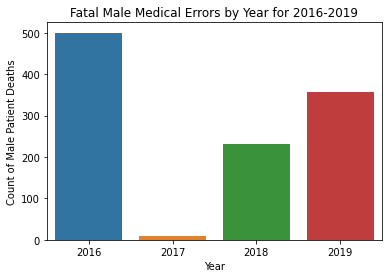

In [215]:
sns.barplot(x="year",y="death", data=male_result)
plt.title('Fatal Male Medical Errors by Year for 2016-2019')
plt.xlabel('Year')
plt.ylabel('Count of Male Patient Deaths')
plt.show()


In [248]:
#create new dictionary to hold the data
f_fatal_error = {'date':[], 'gender':[], 'age': [], 'reaction': [], 'death':[] }

#using ages to loop through the API. 
for age in range(0,101):
    f_url='https://api.fda.gov/drug/event.json?search=patient.reaction.reactionmeddrapt:"administration"+AND+patient.patientsex:"2"+AND+patient.patientonsetage:' + '"' + str(age) + '"'+'+AND+receivedate:[20150101+TO+20191231]&limit=500'
    #creating url query to call only reports with administration as the cause, female sex, age, and range of 4 years.
    f_req=requests.get(f_url)
    f_data = f_req.json()
    #creating a json
    f_fatal_error_datalist = f_data['results']
    for i in range(len(f_fatal_error_datalist)):
        #looping through the length of the datalist to add to the fatal_error dictionary. 
        f_fatal_error['date'].append(f_fatal_error_datalist[0]['receiptdate'])
        f_fatal_error['gender'].append("Female")
        f_fatal_error['age'].append(f_fatal_error_datalist[0]['patient']['patientonsetage'])
        f_fatal_error['reaction'].append(f_fatal_error_datalist[0]['patient']['reaction'][0]['reactionmeddrapt'])
        f_fatal_error['death'].append(f_fatal_error_datalist[0]['serious'])

In [249]:
#creating a new column with just the year. 
f_fatal_error['date'] = pd.to_datetime(f_fatal_error['date'])
f_fatal_error['year'] = f_fatal_error['date'].year
#making a dataframe out of the dictionary. 
f_medical_errors_df = pd.DataFrame.from_dict(f_fatal_error)
f_medical_errors_df

,date,gender,age,reaction,death,year
0,2015-07-07,Female,0,Visual impairment,1,2015
1,2015-07-07,Female,0,Visual impairment,1,2015
2,2015-07-07,Female,0,Visual impairment,1,2015
3,2015-07-07,Female,0,Visual impairment,1,2015
4,2015-07-07,Female,0,Visual impairment,1,2015
...,...,...,...,...,...,...
39107,2015-02-20,Female,99,Drug administration error,1,2015
39108,2015-02-20,Female,99,Drug administration error,1,2015
39109,2015-02-20,Female,99,Drug administration error,1,2015
39110,2015-12-18,Female,100,Incorrect drug administration duration,2,2015


In [253]:
#isolating the results where the patients had the outcome of death. 
f_fatal_error_df = f_medical_errors_df[f_medical_errors_df['death']=='1']
#grouping by year then counting so that I can get a count of deaths organized by year. 
f_fatal_error_bydate = f_fatal_error_df.groupby(['year']).count()
female_result = f_fatal_error_bydate.reset_index()
female_result.drop([0,5], axis=0, inplace=True)
# needed to drop the year that was not the target of the hypothesis. 
female_result.head()


,year,date,gender,age,reaction,death
1,2016,1500,1500,1500,1500,1500
2,2017,489,489,489,489,489
3,2018,137,137,137,137,137
4,2019,401,401,401,401,401


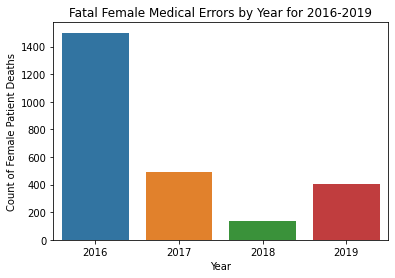

In [254]:
sns.barplot(x="year",y="death", data=female_result)
plt.title('Fatal Female Medical Errors by Year for 2016-2019')
plt.xlabel('Year')
plt.ylabel('Count of Female Patient Deaths')
plt.show()

In [271]:
f_fatal_error_byage = f_fatal_error_df.groupby(['age'])

f_fatal_error_byage.head()

,date,gender,age,reaction,death,year
0,2015-07-07,Female,0,Visual impairment,1,2015
1,2015-07-07,Female,0,Visual impairment,1,2015
2,2015-07-07,Female,0,Visual impairment,1,2015
3,2015-07-07,Female,0,Visual impairment,1,2015
4,2015-07-07,Female,0,Visual impairment,1,2015
...,...,...,...,...,...,...
39099,2015-02-20,Female,99,Drug administration error,1,2015
39100,2015-02-20,Female,99,Drug administration error,1,2015
39101,2015-02-20,Female,99,Drug administration error,1,2015
39102,2015-02-20,Female,99,Drug administration error,1,2015


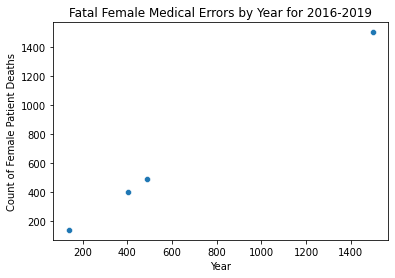

In [272]:
sns.scatterplot(x="age",y="date", data=female_result)
plt.title('Fatal Female Medical Errors by Year for 2016-2019')
plt.xlabel('Year')
plt.ylabel('Count of Female Patient Deaths')
plt.show()